In [2]:
from sklearn.base import BaseEstimator
import numpy as np

In [5]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred= np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df     

def transform_feafures(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df    

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_feafures(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size=0.2,
                                                 random_state=0)
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test,pred)

0.7877094972067039

In [7]:
from sklearn.datasets import load_digits

In [8]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [10]:
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)
y_test.shape,pd.Series(y_test).value_counts()

((450,),
 0    405
 1     45
 dtype: int64)

In [11]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
pred = fakeclf.predict(X_test)
accuracy_score(y_test,pred)

0.9

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test,pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [15]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f}')

In [16]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_feafures(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size=0.2,
                                                 random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [19]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681


In [22]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
pred_proba[:7],pred[:7]

(array([[0.85240307, 0.14759693],
        [0.89322803, 0.10677197],
        [0.9331064 , 0.0668936 ],
        [0.05432752, 0.94567248],
        [0.31326274, 0.68673726],
        [0.49603981, 0.50396019],
        [0.08301599, 0.91698401]]),
 array([0, 0, 0, 1, 1, 1, 1], dtype=int64))

In [23]:
from sklearn.preprocessing import Binarizer

In [24]:
X= [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

In [26]:
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [28]:
custom_threshold=0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)
# 오차행렬
# [[92 18]
#  [16 53]]
# 정확도:0.8101,정밀도:0.7465,재현율:0.7681

오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681


In [29]:
custom_threshold=0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[86 24]
 [14 55]]
정확도:0.7877,정밀도:0.6962,재현율:0.7971


In [30]:
custom_threshold=0.6
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[99 11]
 [25 44]]
정확도:0.7989,정밀도:0.8000,재현율:0.6377


In [31]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [36]:
precision,recall,thresholds = precision_recall_curve(y_test,pred_proba_class1)

In [37]:
precision.shape,recall.shape,thresholds.shape

((167,), (167,), (166,))

In [38]:
thr_index = np.arange(0,thresholds.shape[0],15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165])

In [39]:
print(np.round(precision[thr_index],3))
print(np.round(recall[thr_index],3))

[0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
[1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as kicker

In [45]:
def precision_recall_curve_plot(y_test,pred_proba):
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()    
    plt.show()
    

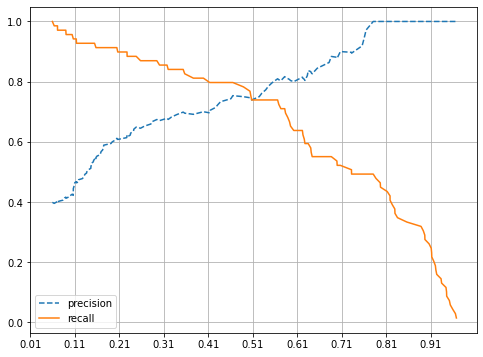

In [46]:
precision_recall_curve_plot(y_test,pred_proba_class1)

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1 = f1_score(y_test,pred)
f1

0.7571428571428571

In [49]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},F1:{f1:.4f}')

In [50]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[86 24]
 [14 55]]
정확도:0.7877,정밀도:0.6962,재현율:0.7971,F1:0.7432
임계값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도:0.8156,정밀도:0.7432,재현율:0.7971,F1:0.7692
임계값: 0.5
오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681,F1:0.7571
임계값: 0.55
오차행렬
[[97 13]
 [18 51]]
정확도:0.8268,정밀도:0.7969,재현율:0.7391,F1:0.7669
임계값: 0.6
오차행렬
[[99 11]
 [25 44]]
정확도:0.7989,정밀도:0.8000,재현율:0.6377,F1:0.7097


In [51]:
from sklearn.metrics import roc_curve

In [53]:
fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)

In [54]:
thr_index = np.arange(1,thresholds.shape[0],5)
thr_index

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])

In [55]:
fprs[thr_index]

array([0.        , 0.04545455, 0.1       , 0.16363636, 0.25454545,
       0.3       , 0.47272727, 0.67272727, 0.79090909, 0.91818182])

In [56]:
tprs[thr_index]

array([0.01449275, 0.55072464, 0.63768116, 0.79710145, 0.84057971,
       0.88405797, 0.91304348, 0.92753623, 0.94202899, 0.97101449])

In [57]:
def roc_curve_plot(y_test,pred_proba):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba)
    plt.plot(fprs,tprs,label='Roc')
    plt.show()

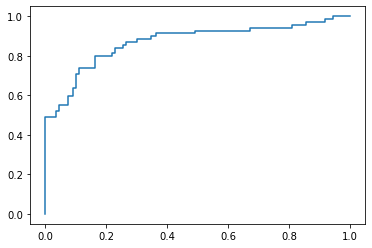

In [58]:
roc_curve_plot(y_test,pred_proba_class1)